In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches
from matplotlib import cm

 
class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz
 
    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)
 
def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''
 
    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)
 
setattr(Axes3D,'annotate3D',_annotate3D)
 
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)
 
    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)
 
        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)
 
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''
 
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
 
setattr(Axes3D,'arrow3D',_arrow3D)
 

In [2]:

def quad_func_1(v, A):
    return (np.dot(v, A) * v).sum(axis=1)
    #return np.dot(v, np.dot(A, v))
    

def show_3d_scatter(ax, xx, yy, v, z_max, z_min,title_str):
    f = v.copy()
    #f = f.reshape(resolution, resolution)
    #f = f.T
    xx = xx.reshape(-1, 1)
    yy = yy.reshape(-1, 1)
    
    
    for i in range(len(f)):
        #print(f[i])
        if(f[i] is None):
            continue
        #print(blue_red_gradation(f[i], z_max, z_min))
        #ax.scatter"(xx[i], yy[i], f[i], c=blue_red_gradation(f[i], z_max, z_min), alpha=0.5)
        
    ax.scatter(xx, yy, f,c=f,   alpha=0.7, cmap=cm.coolwarm, s=5)
    ax.view_init(30, 110)
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    #ax.set_zticks(v_ticks)
    ax.set_zlim(z_min, z_max)
    ax.set_title(title_str, fontsize=30)
    
# A function to mix blue and red colors. 
def blue_red_gradation(z, z_max, z_min):
    red = np.array([1.0, 0.0, 0.0])
    blue = np.array([0.0, 0.0, 1.0])
    z_center = (z_max + z_min) /  2
    combined_color_z =  max(0, z-z_center)/z_center*blue + abs(min(z-z_center, 0))/z_center*red
    return combined_color_z[np.newaxis, ...]


In [3]:
A = np.array([[6, 2], [2, 3]]) 
_, rotation_matrix = np.linalg.eig(A)

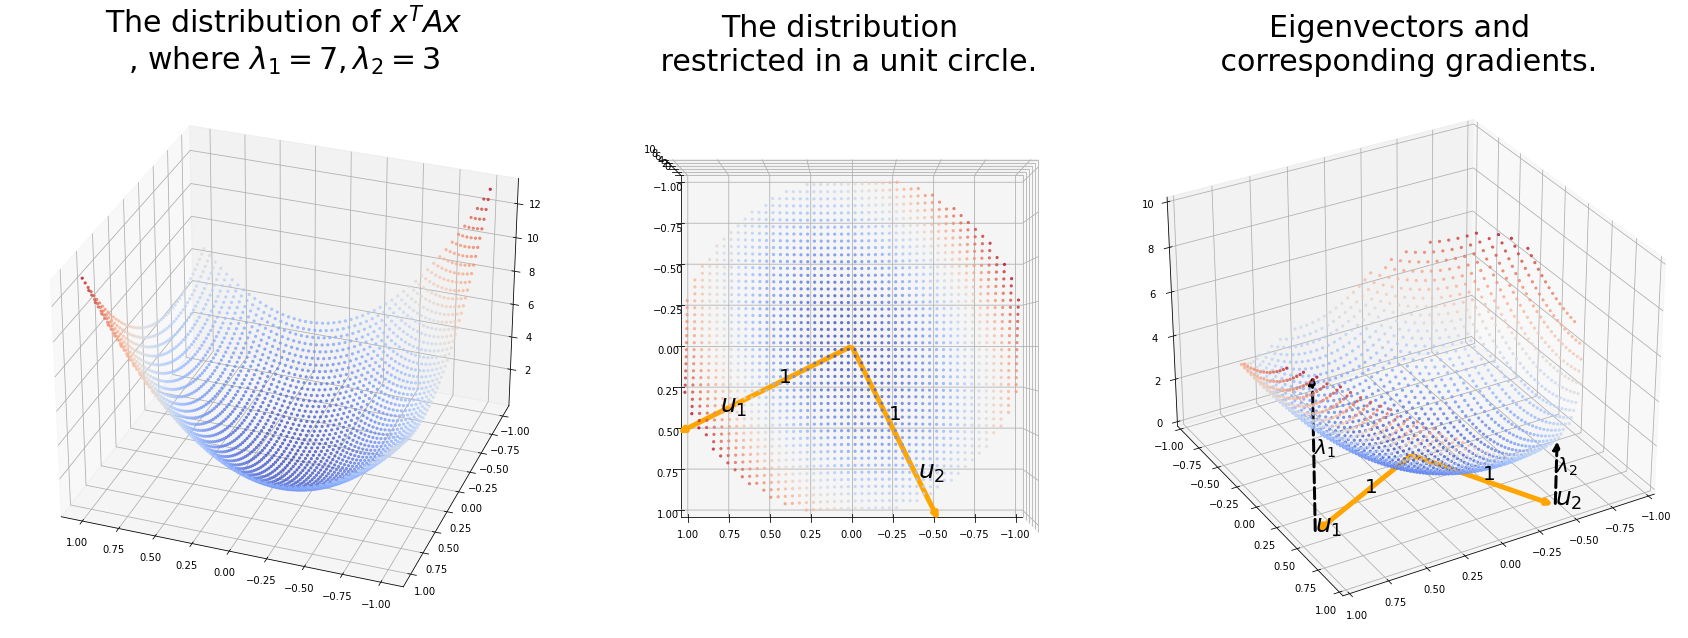

In [4]:
resolution = 50
x_scale = 1
x_range = np.linspace(-x_scale, x_scale, resolution)
y_scale = 1
y_range = np.linspace(-y_scale, y_scale, resolution)
xx, yy = np.meshgrid(x_range, y_range)
#x = np.c_[np.reshape(xx, resolution * resolution, 1), np.reshape(yy, xn * xn, 1)]
x = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

radius = 1
center_point = np.zeros(2)
meshgrid_mask = np.zeros(x.shape[0]).astype(bool)
for i in range(meshgrid_mask.shape[0]):
    if(np.linalg.norm(x[i] - center_point)<radius):
        meshgrid_mask[i] = np.ones(1).astype(bool)

fig = plt.figure(figsize=(30, 15))
plt.subplots_adjust(wspace=0.01, hspace=0.1)

B = np.dot(np.dot(rotation_matrix, np.diag(np.array([7, 3]))), rotation_matrix.T)


eigen_values, U = np.linalg.eig(B)

f = quad_func_1(x, B)

z_max, z_min = f.max(), f.min()

ax = fig.add_subplot(1, 3, 1 , projection='3d')
show_3d_scatter(ax,xx, yy,  f,z_max, z_min, "The distribution of $x^T A x$ \n, where $\lambda_1=7, \lambda_2=3$")

f[np.where(meshgrid_mask == False)[0]] = np.nan

ax = fig.add_subplot(1, 3, 2 , projection='3d')
show_3d_scatter(ax,xx, yy,  f,z_max, z_min, 'The distribution \n restricted in a unit circle.')

sqrt_lmbd_1 = np.sqrt(eigen_values[0])
sqrt_lmbd_2 = np.sqrt(eigen_values[1])

ax.arrow3D(0, 0, 10, U.T[0][0], U.T[0][1], 10, mutation_scale=10,  lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
ax.arrow3D(0, 0, 10, U.T[1][0], U.T[1][1], 10,  mutation_scale=10,  lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
ax.text(U.T[0][0]/2, U.T[0][1]/2, 0, r'$1$', fontsize=20)
ax.text(U.T[1][0]/2, U.T[1][1]/2, 0, r'$1$', fontsize=20)
ax.text(U.T[0][0]*9/10, U.T[0][1]*9/10, 0, r'$u_1$', fontsize=25)
ax.text(U.T[1][0]*9/10, U.T[1][1]*9/10, 0, r'$u_2$', fontsize=25)


temp_range=1
ax.set_xlim(-temp_range, temp_range)
ax.set_ylim(-temp_range, temp_range)
ax.set_zlim(0, 10)
ax.view_init(90, 90)

ax = fig.add_subplot(1, 3, 3 , projection='3d')
show_3d_scatter(ax,xx, yy,  f,z_max, z_min, 'Eigenvectors and \n corresponding gradients.')

sqrt_lmbd_1 = np.sqrt(eigen_values[0])
sqrt_lmbd_2 = np.sqrt(eigen_values[1])

ax.arrow3D(0, 0, 0, U.T[0][0], U.T[0][1], 0, mutation_scale=10,  lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
ax.arrow3D(0, 0, 0, U.T[1][0], U.T[1][1], 0, mutation_scale=10,  lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
ax.text(U.T[0][0]/2, U.T[0][1]/2, 0, r'$1$', fontsize=20)
ax.text(U.T[1][0]/2, U.T[1][1]/2, 0, r'$1$', fontsize=20)
#ax.text(U.T[0][0]*4/5, U.T[0][1]*4/5, 0, r'$u_1$', fontsize=25)
#ax.text(U.T[1][0]*4/5, U.T[1][1]*4/5, 0, r'$u_2$', fontsize=25)
ax.text(U.T[0][0], U.T[0][1], 0, r'$u_1$', fontsize=25)
ax.text(U.T[1][0], U.T[1][1], 0, r'$u_2$', fontsize=25)


ax.arrow3D(U.T[0][0], U.T[0][1], 0, 0, 0, eigen_values[0], mutation_scale=15,  lw = 3, arrowstyle="-|>", linestyle='dashed', fc='black', ec='black')
ax.arrow3D(U.T[1][0], U.T[1][1], 0, 0, 0, eigen_values[1], mutation_scale=15,  lw = 3, arrowstyle="-|>", linestyle='dashed', fc='black', ec='black')
ax.text(U.T[0][0], U.T[0][1], eigen_values[0]/2, r'$\lambda_1$', fontsize=20)
ax.text(U.T[1][0], U.T[1][1], eigen_values[1]/2, r'$\lambda_2$', fontsize=20)


temp_range=1
ax.set_xlim(-temp_range, temp_range)
ax.set_ylim(-temp_range, temp_range)
ax.set_zlim(0, 10)
ax.view_init(30, 60)
plt.savefig("quad_curve_gradient.png")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in sqrt


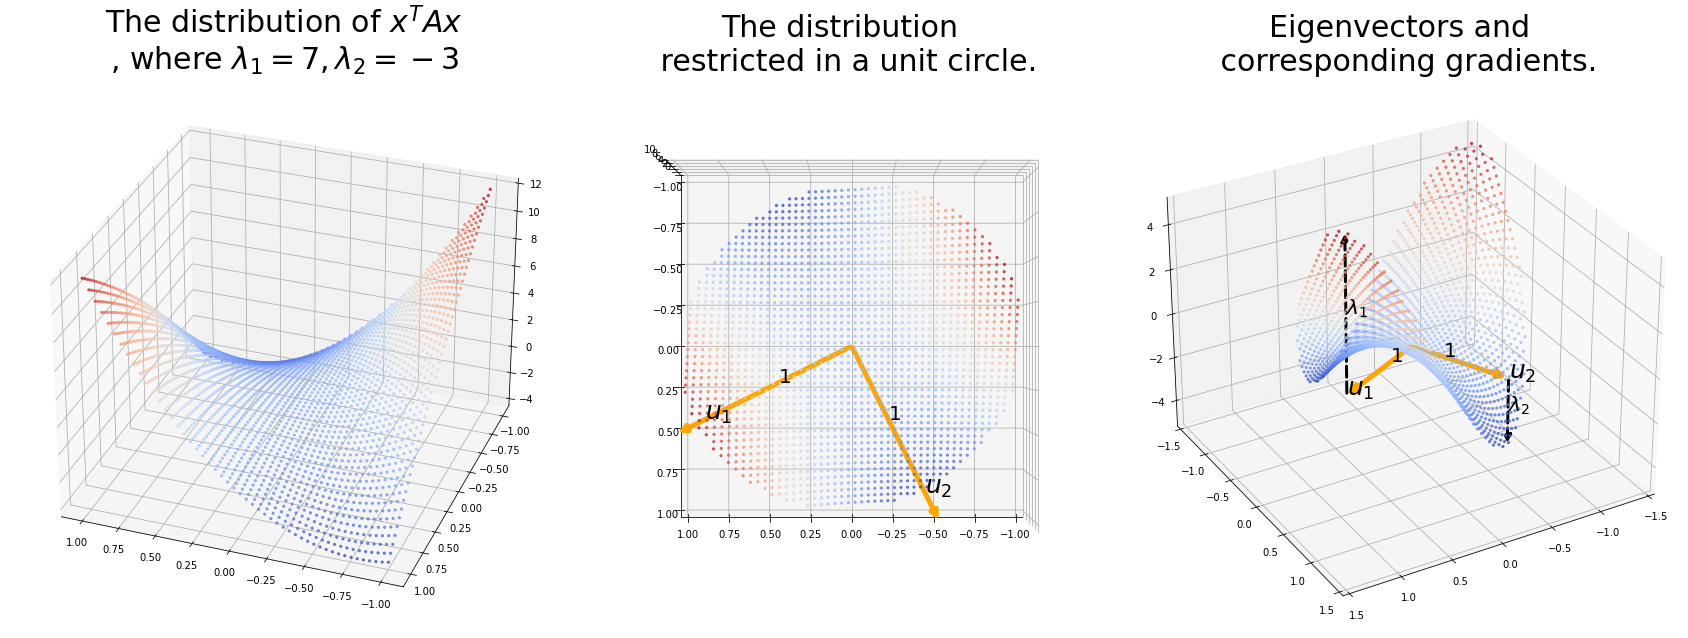

In [5]:
resolution = 50
x_scale = 1
x_range = np.linspace(-x_scale, x_scale, resolution)
y_scale = 1
y_range = np.linspace(-y_scale, y_scale, resolution)
xx, yy = np.meshgrid(x_range, y_range)
#x = np.c_[np.reshape(xx, resolution * resolution, 1), np.reshape(yy, xn * xn, 1)]
x = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

radius = 1
center_point = np.zeros(2)
meshgrid_mask = np.zeros(x.shape[0]).astype(bool)
for i in range(meshgrid_mask.shape[0]):
    if(np.linalg.norm(x[i] - center_point)<radius):
        meshgrid_mask[i] = np.ones(1).astype(bool)

fig = plt.figure(figsize=(30, 15))
plt.subplots_adjust(wspace=0.01, hspace=0.1)

B = np.dot(np.dot(rotation_matrix, np.diag(np.array([7, -3]))), rotation_matrix.T)

eigen_values, U = np.linalg.eig(B)


f = quad_func_1(x, B)

z_max, z_min = f.max(), f.min()

ax = fig.add_subplot(1, 3, 1 , projection='3d')
show_3d_scatter(ax,xx, yy,  f,z_max, z_min, "The distribution of $x^T A x$ \n, where $\lambda_1=7, \lambda_2=-3$")


f[np.where(meshgrid_mask == False)[0]] = np.nan

ax = fig.add_subplot(1, 3, 2 , projection='3d')
show_3d_scatter(ax,xx, yy,  f,z_max, z_min, 'The distribution \n restricted in a unit circle.')

sqrt_lmbd_1 = np.sqrt(eigen_values[0])
sqrt_lmbd_2 = np.sqrt(eigen_values[1])

ax.arrow3D(0, 0, 10, U.T[0][0], U.T[0][1], 10, mutation_scale=15,  lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
ax.arrow3D(0, 0, 10, U.T[1][0], U.T[1][1], 10,  mutation_scale=15,  lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
ax.text(U.T[0][0]/2, U.T[0][1]/2, 0, r'$1$', fontsize=20)
ax.text(U.T[1][0]/2, U.T[1][1]/2, 0, r'$1$', fontsize=20)
ax.text(U.T[0][0], U.T[0][1], 0, r'$u_1$', fontsize=25)
ax.text(U.T[1][0], U.T[1][1], 0, r'$u_2$', fontsize=25)


temp_range=1
ax.set_xlim(-temp_range, temp_range)
ax.set_ylim(-temp_range, temp_range)
ax.set_zlim(0, 10)
ax.view_init(90, 90)

ax = fig.add_subplot(1, 3, 3 , projection='3d')
show_3d_scatter(ax,xx, yy,  f,z_max, z_min,  'Eigenvectors and \n corresponding gradients.')

sqrt_lmbd_1 = np.sqrt(eigen_values[0])
sqrt_lmbd_2 = np.sqrt(eigen_values[1])

ax.arrow3D(0, 0, 0, U.T[0][0], U.T[0][1], 0, mutation_scale=15,  lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
ax.arrow3D(0, 0, 0, U.T[1][0], U.T[1][1], 0, mutation_scale=15,  lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
ax.text(U.T[0][0]/3, U.T[0][1]/3, 0, r'$1$', fontsize=20)
ax.text(U.T[1][0]/3, U.T[1][1]/3, 0, r'$1$', fontsize=20)

ax.arrow3D(U.T[0][0], U.T[0][1], 0, 0, 0, eigen_values[0], mutation_scale=15,  lw = 3, arrowstyle="-|>", linestyle='dashed', fc='black', ec='black')
ax.arrow3D(U.T[1][0], U.T[1][1], 0, 0, 0, eigen_values[1], mutation_scale=15,  lw = 3, arrowstyle="-|>", linestyle='dashed', fc='black', ec='black')
ax.text(U.T[0][0], U.T[0][1], eigen_values[0]/2, r'$\lambda_1$', fontsize=20)
ax.text(U.T[1][0], U.T[1][1], eigen_values[1]/2, r'$\lambda_2$', fontsize=20)
ax.text(U.T[0][0], U.T[0][1], 0, r'$u_1$', fontsize=25)
ax.text(U.T[1][0], U.T[1][1], 0, r'$u_2$', fontsize=25)


temp_range=1.5
ax.set_xlim(-temp_range, temp_range)
ax.set_ylim(-temp_range, temp_range)
ax.set_zlim(-5, 5)
ax.view_init(30, 60)
plt.savefig("quad_curve_gradient_2.png")
plt.show()


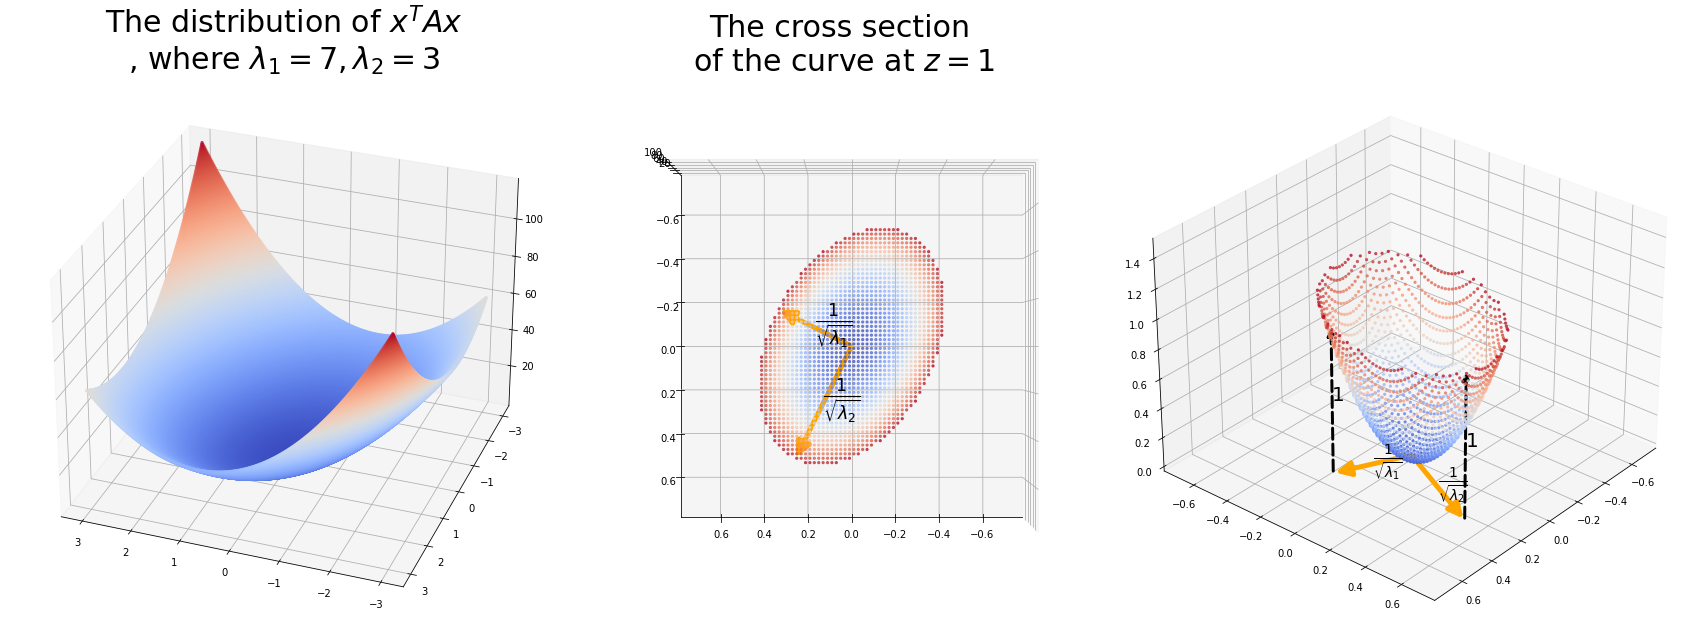

In [6]:
resolution = 300
x_scale = 3
x_range = np.linspace(-x_scale, x_scale, resolution)
y_scale = 3
y_range = np.linspace(-y_scale, y_scale, resolution)
xx, yy = np.meshgrid(x_range, y_range)
#x = np.c_[np.reshape(xx, resolution * resolution, 1), np.reshape(yy, xn * xn, 1)]
x = np.c_[xx.reshape(-1, 1), yy.reshape(-1, 1)]

radius = 100
center_point = np.zeros(2)
meshgrid_mask = np.zeros(x.shape[0]).astype(bool)
for i in range(meshgrid_mask.shape[0]):
    if(np.linalg.norm(x[i] - center_point)<radius):
        meshgrid_mask[i] = np.ones(1).astype(bool)    
    
B = np.dot(np.dot(rotation_matrix.T, np.diag(np.array([7, 3]))), rotation_matrix)
eigen_values, U = np.linalg.eig(B)

fig = plt.figure(figsize=(30, 15))
plt.subplots_adjust(wspace=0.01, hspace=0.1)

f = quad_func_1(x, B)
z_max, z_min = f.max(), f.min()

ax = fig.add_subplot(1, 3, 1 , projection='3d')
show_3d_scatter(ax,xx, yy,  f,z_max, z_min,  "The distribution of $x^T A x$ \n, where $\lambda_1=7, \lambda_2=3$")

f[np.where(f>=1)] = np.nan

ax = fig.add_subplot(1, 3, 2 , projection='3d')
show_3d_scatter(ax,xx, yy,  f,z_max, z_min, "The cross section \nof the curve at $z=1$")

sqrt_lmbd_1 = np.sqrt(eigen_values[0])
sqrt_lmbd_2 = np.sqrt(eigen_values[1])

ax.arrow3D(0, 0, 0, U.T[0][0]/sqrt_lmbd_1, U.T[0][1]/sqrt_lmbd_1, 0, mutation_scale=30, lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
ax.arrow3D(0, 0, 0, U.T[1][0]/sqrt_lmbd_2, U.T[1][1]/sqrt_lmbd_2, 0, mutation_scale=30, lw = 5, arrowstyle="-|>", fc='orange', ec='orange')

#ax.arrow3D(0, 0, 0, U[0][0]*sqrt_lmbd_1, U[0][1]*sqrt_lmbd_1, 0, mutation_scale=30, lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
#ax.arrow3D(0, 0, 0, U[1][0]*sqrt_lmbd_2, U[1][1]*sqrt_lmbd_2, 0, mutation_scale=30, lw = 5, arrowstyle="-|>", fc='orange', ec='orange')


ax.text(U.T[0][0]/sqrt_lmbd_1/2, U.T[0][1]/sqrt_lmbd_1/2, 0,  r'$\frac{1}{\sqrt{\lambda_1}}$', fontsize=25)
ax.text(U.T[1][0]/sqrt_lmbd_2/2, U.T[1][1]/sqrt_lmbd_2/2, 0, r'$\frac{1}{\sqrt{\lambda_2}}$', fontsize=25)

temp_range = 0.75

ax.set_xlim(-temp_range, temp_range)
ax.set_ylim(-temp_range, temp_range)

ax.view_init(90, 90)

f[np.where(f>=1)] = np.nan

ax = fig.add_subplot(1, 3, 3 , projection='3d')
show_3d_scatter(ax,xx, yy,  f,z_max, z_min, '')

sqrt_lmbd_1 = np.sqrt(eigen_values[0])
sqrt_lmbd_2 = np.sqrt(eigen_values[1])

ax.arrow3D(0, 0, 0, U.T[0][0]/sqrt_lmbd_1, U.T[0][1]/sqrt_lmbd_1, 0, mutation_scale=30,  lw = 5, arrowstyle="-|>", fc='orange', ec='orange')
ax.arrow3D(0, 0, 0, U.T[1][0]/sqrt_lmbd_2, U.T[1][1]/sqrt_lmbd_2, 0, mutation_scale=30,  lw = 5, arrowstyle="-|>", fc='orange', ec='orange')

ax.arrow3D(U.T[0][0]/sqrt_lmbd_1, U.T[0][1]/sqrt_lmbd_1, 0, 0, 0, 1, mutation_scale=15,  lw = 3, arrowstyle="-|>", linestyle='dashed', fc='black', ec='black')
ax.arrow3D(U.T[1][0]/sqrt_lmbd_2, U.T[1][1]/sqrt_lmbd_2, 0, 0, 0, 1, mutation_scale=15,  lw = 3, arrowstyle="-|>", linestyle='dashed', fc='black', ec='black')

ax.text(U.T[0][0]/sqrt_lmbd_1/2, U.T[0][1]/sqrt_lmbd_1/2, 0,  r'$\frac{1}{\sqrt{\lambda_1}}$', fontsize=20)
ax.text(U.T[1][0]/sqrt_lmbd_2/2, U.T[1][1]/sqrt_lmbd_2/2, 0, r'$\frac{1}{\sqrt{\lambda_2}}$', fontsize=20)

ax.text(U.T[0][0]/sqrt_lmbd_1, U.T[0][1]/sqrt_lmbd_1, 1/2,  r'1', fontsize=20)
ax.text(U.T[1][0]/sqrt_lmbd_2, U.T[1][1]/sqrt_lmbd_2, 1/2, r'1', fontsize=20)

temp_range = 0.75

ax.set_xlim(-temp_range, temp_range)
ax.set_ylim(-temp_range, temp_range)
ax.set_zlim(0,  1.5)
ax.view_init(30, 40)
plt.savefig("quad_curve_slice.png")
plt.show()